In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 677.8 kB/s eta 0:00:0000:0100:01


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [3]:
df = pd.read_csv('/Users/biswajit/Downloads/true.txt', header = None, index_col = 0)
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df = df[[2,3]].reset_index(drop = True)

In [5]:
df.columns = ['sentiment', 'text']

In [6]:
df

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...
...,...,...
75677,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75679,Positive,Today sucked so it’s time to drink wine n play...
75680,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [8]:
df.isnull().sum()
df.dropna(inplace = True)

In [9]:
sum(df['text'].apply(len)>5), sum(df['text'].apply(len)<=5)

(72883, 2113)

In [10]:
print(df.shape)
df = df[df['text'].apply(len)>5]
print(df.shape)

(74996, 2)
(72883, 2)


In [11]:
df.sample(10)

,sentiment,text
21910,Positive,Idk why people play valorant game instead of c...
1476,Neutral,The full moon turned? Gaige lunged with her re...
10771,Positive,"Wow, that's a really good deal. ""512 GB SSD."" ..."
57127,Negative,@ Ubisoft @ UbisoftSupport @ Rainbow6Game repa...
30680,Neutral,"After almost 10 years, I have finally changed ..."
11691,Negative,@Ronnie2K … @LD2K @Beluba I need somebody Char...
72533,Negative,All is more reason Why Never Use GeForce Exper...
50098,Negative,Never been more disinterested here in Fifa and...
31825,Neutral,Take a look at my video!
38344,Neutral,Over Nieuw artikel : A brand new Ranked Ladder...


In [12]:
df['sentiment'].value_counts()

sentiment
Negative      22020
Positive      20186
Neutral       17899
Irrelevant    12778
Name: count, dtype: int64

# Preprocessing 

In [19]:
import preprocess_kgptalkie as ps
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [20]:
df.columns

Index(['sentiment', 'text'], dtype='object')

In [21]:
df = ps.get_basic_features(df)

In [22]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

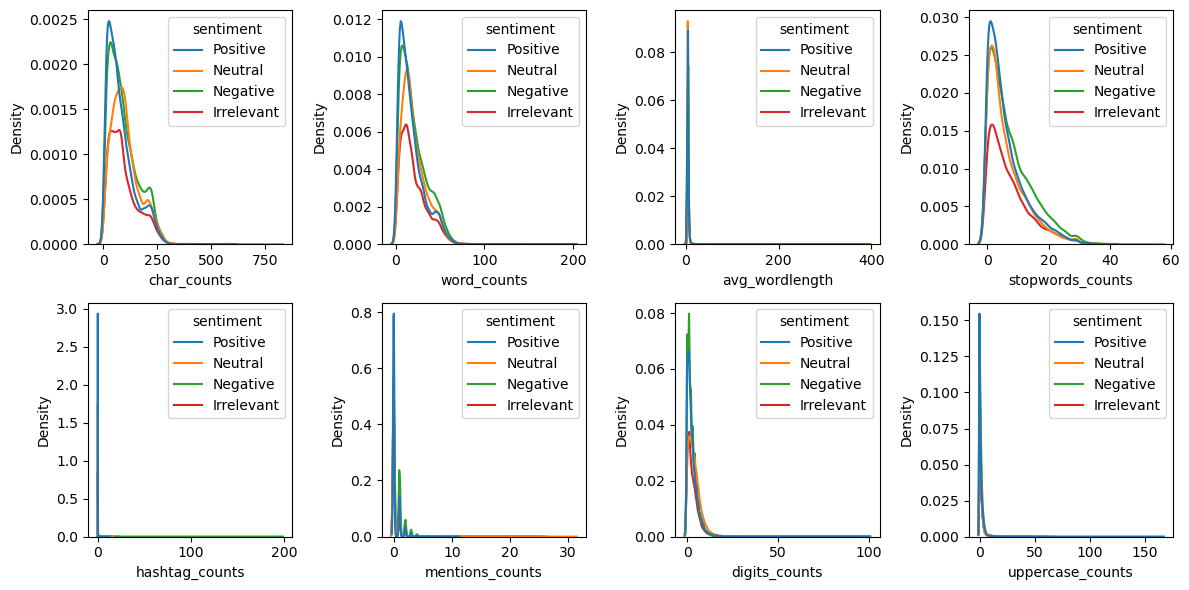

In [40]:
df.head

#hashtag, @mentions, 123, UPPER

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
num_cols = df.select_dtypes(include='number').columns

for index, col in enumerate(num_cols):
    plt.subplot(2,4, index+1)
    sns.kdeplot(data=df, x=col, hue="sentiment", fill=False)
    
plt.tight_layout()    
plt.show()

<Axes: ylabel='count'>

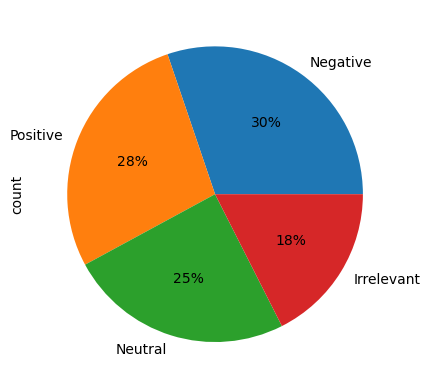

In [41]:
df['sentiment'].value_counts().plot(kind='pie', autopct="%1.0f%%")

## Wordcloud visualization

In [42]:
!pip install wordcloud

In [43]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

In [44]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

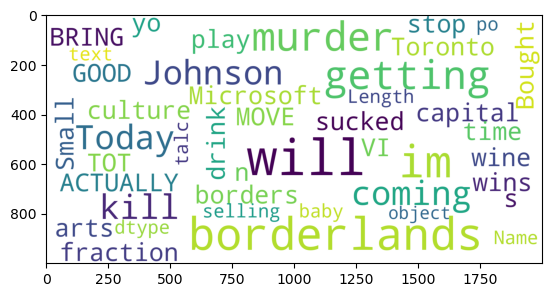

In [47]:
wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=300, max_font_size=40,scale=5).generate(str(df['text']))
plt.imshow(wordcloud)

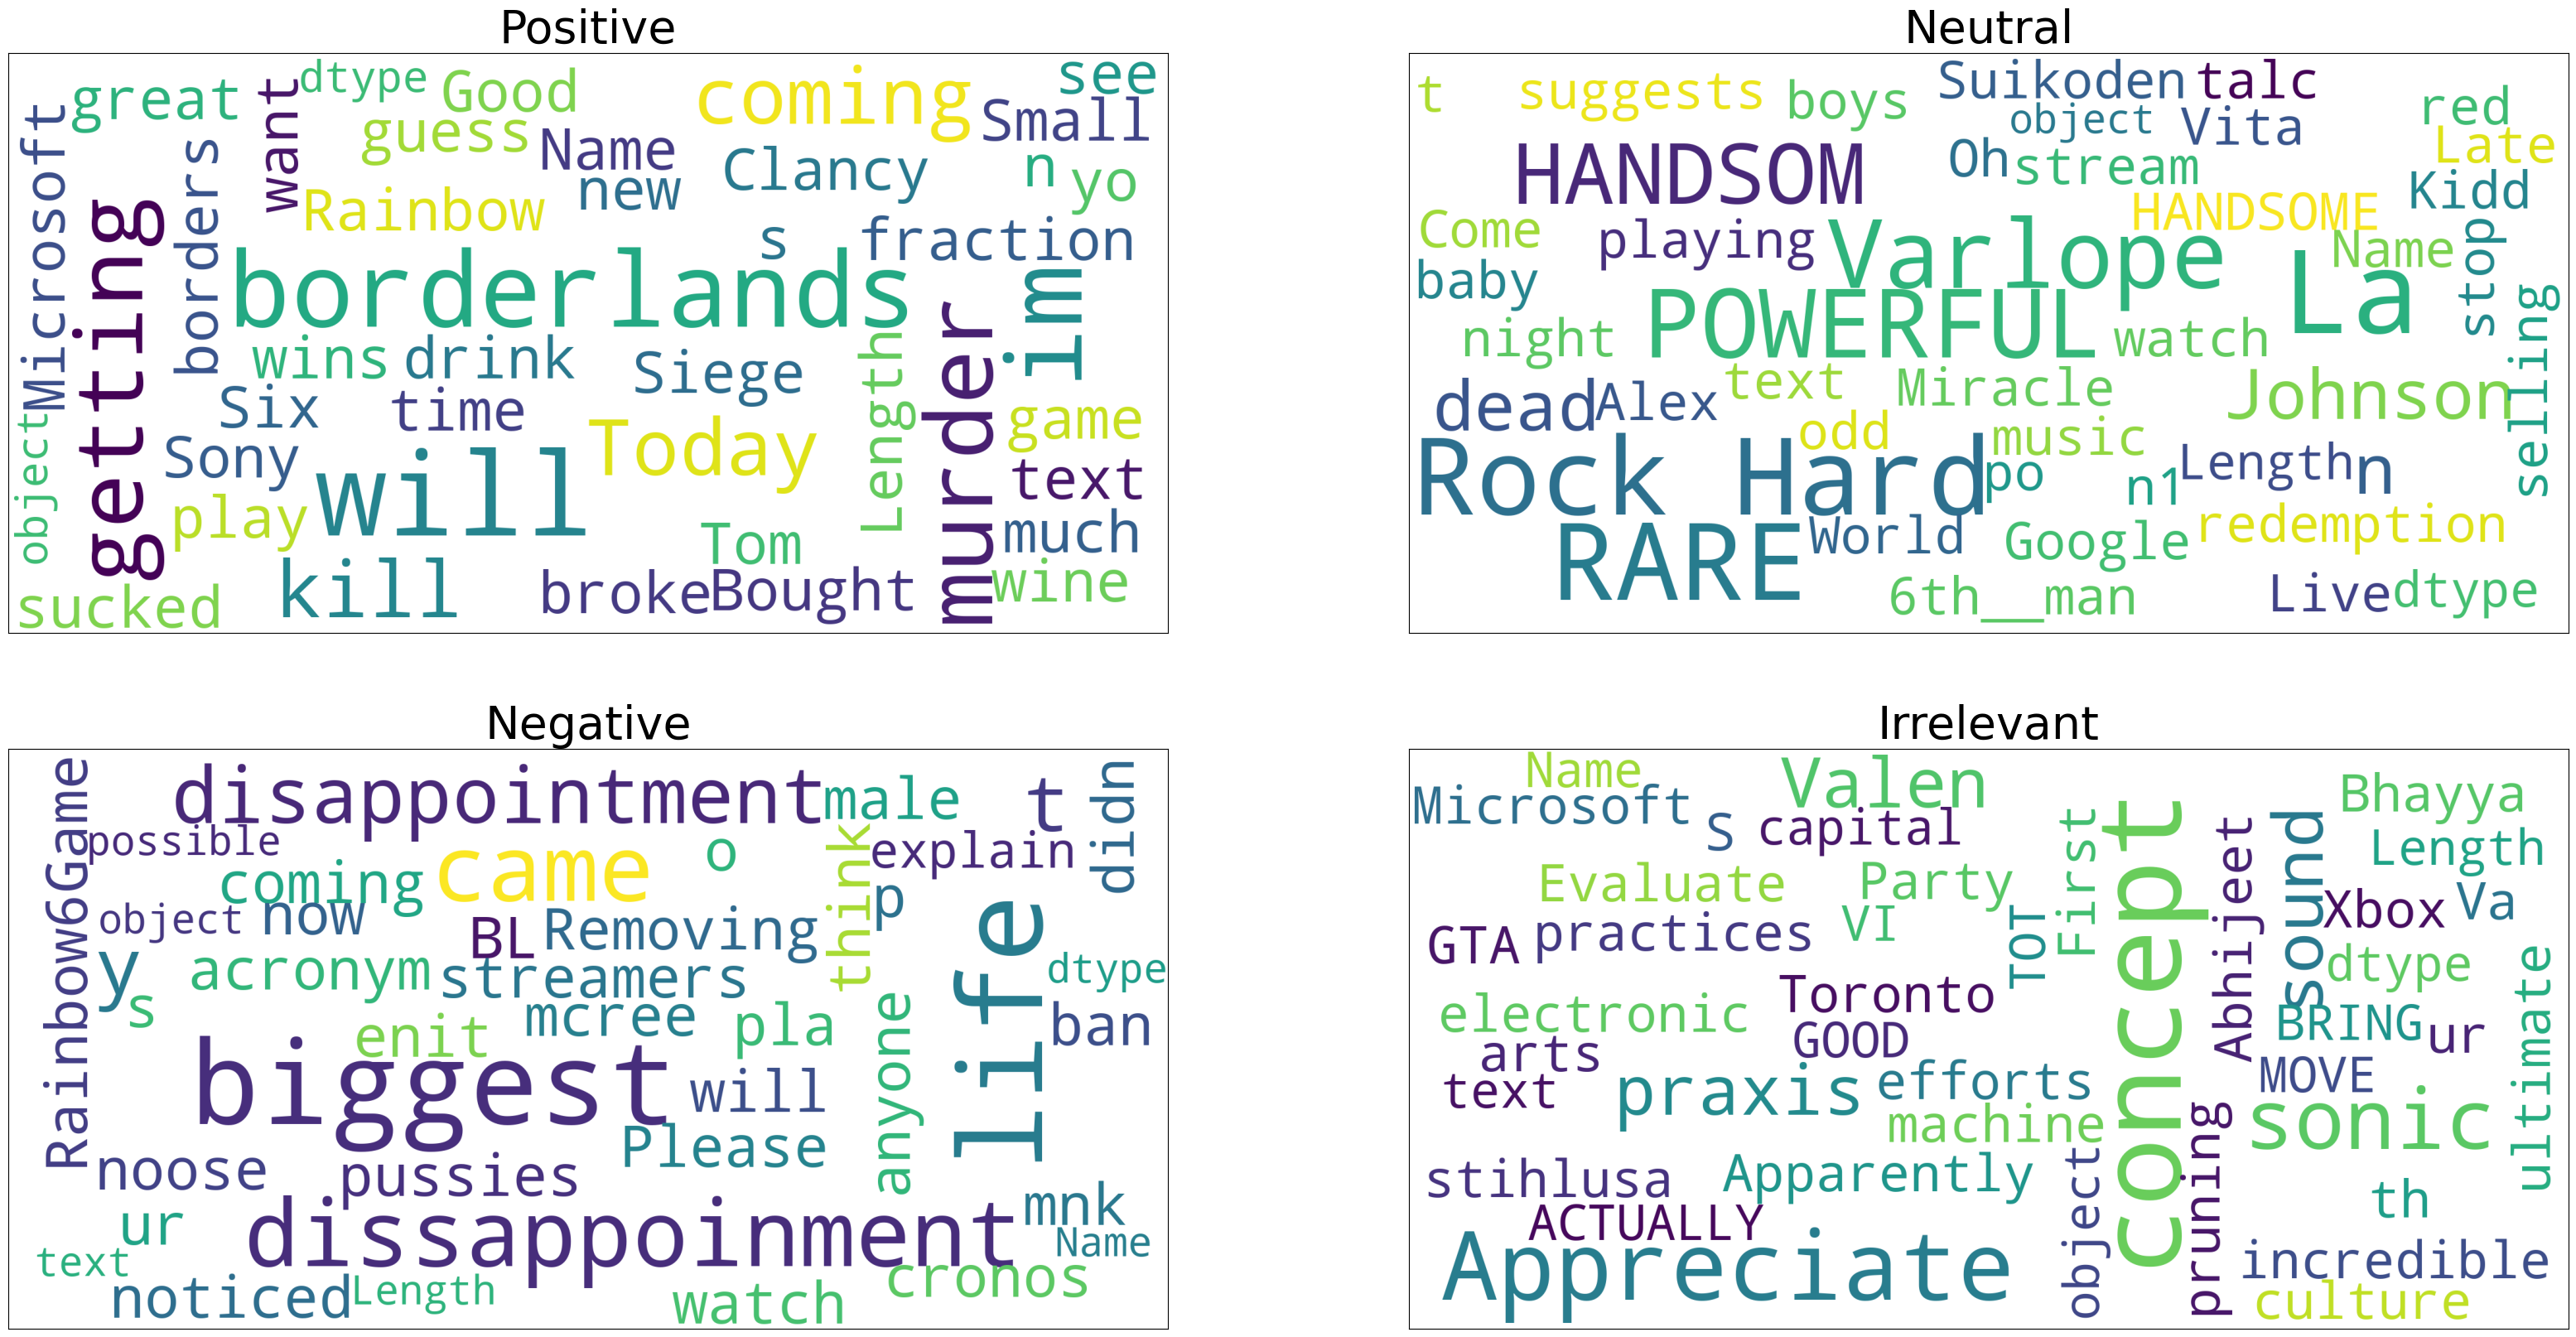

In [55]:
plt.figure(figsize=(40,20))

for index, sent in enumerate(df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    
    data = df[df['sentiment']==sent]['text']
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=300, max_font_size=40,scale=5).generate(str(data))
    plt.imshow(wordcloud)
    plt.xticks([])
    plt.yticks([])
    plt.title(sent, fontsize=40)

## Data Cleaning

In [58]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: ps.remove_urls(x))
df['text'] = df['text'].apply(lambda x: ps.remove_html_tags(x))
df['text'] = df['text'].apply(lambda x: ps.remove_rt(x))
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))

In [61]:
# train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['sentiment'],test_size=0.2,random_state=0)

## Miodel Building and Testing 

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline



Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rcf', RandomForestClassifier(n_jobs=-1))])

In [72]:
clf = Pipeline([('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [68]:
#evaluation
from sklearn.metrics import classification_report

In [69]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.98      0.85      0.91      2561
    Negative       0.92      0.96      0.94      4481
     Neutral       0.92      0.92      0.92      3553
    Positive       0.91      0.94      0.92      3982

    accuracy                           0.92     14577
   macro avg       0.93      0.92      0.92     14577
weighted avg       0.93      0.92      0.92     14577



In [73]:
import pickle
pickle.dump(clf, open("twitter_sentiment.pkl", 'wb'))

In [74]:
clf.predict(['let me not upset you'])

array(['Negative'], dtype=object)

In [75]:
clf.predict(['really glad to see you'])

array(['Positive'], dtype=object)

In [76]:
clf.predict(['lets play gta'])

array(['Positive'], dtype=object)

In [77]:
clf.predict(['we booked two rooms'])

array(['Positive'], dtype=object)

In [78]:
clf.predict(['how the hell are we into haloween maont already'])

array(['Irrelevant'], dtype=object)

In [80]:
clf.predict(['i have done but play borderland'])

array(['Positive'], dtype=object)